In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("../../labelled_data/DMEPOS/imputed_dmepos.csv")

In [3]:
df = df.drop(["Unnamed: 0","Rfrg_NPI"],axis=1)

In [4]:
df

,Rfrg_Prvdr_Crdntls,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Rfrg_Prvdr_Type_Flag,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,...,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Fraud,FraudType
0,2362,0.0,44,1.0,8,7,11.0,132,159,29869.97,...,0.75,0.75,0.32,0.00,0.64,0.0,0.00,3.729650,0,0
1,3017,0.0,26,1.0,28,47,33.0,97,1136,44435.62,...,0.73,0.75,0.39,0.00,0.58,0.0,0.00,1.654308,0,0
2,1629,1.0,44,1.0,11,44,19.0,65,1117,18711.69,...,0.74,0.75,0.53,0.00,0.68,0.0,0.00,1.894526,0,0
3,2684,0.0,117,1.0,5,12,23.0,29,4778,26951.30,...,0.54,0.69,0.48,0.00,0.75,0.0,0.00,2.173167,0,0
4,4511,1.0,87,1.0,1,1,13.0,13,13,2080.00,...,0.75,0.75,0.00,0.00,0.75,0.0,0.00,0.819692,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383452,3017,1.0,44,1.0,35,67,46.0,180,4981,107216.47,...,0.75,0.75,0.50,0.40,0.57,0.0,0.00,2.350335,0,0
383453,2362,0.0,26,1.0,12,17,11.0,35,384,11429.84,...,0.75,0.75,0.00,0.00,0.52,0.0,0.00,1.382273,0,0
383454,1186,0.0,44,1.0,47,56,86.0,502,11743,173452.58,...,0.60,0.73,0.66,0.14,0.47,0.0,0.07,2.096019,0,0
383455,2362,1.0,44,1.0,11,27,14.0,55,322,19471.42,...,0.75,0.75,0.35,0.00,0.57,0.0,0.00,1.451024,0,0


(306765, 75)
(306765, 1, 75)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 150)               90600     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 110057 (429.91 KB)
Trainable params: 110057 (429.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1918/1918 [==============================] - 43s 21ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0021 - val_accuracy: 0.9998
Epoch 2/10
1918/1918 [=================

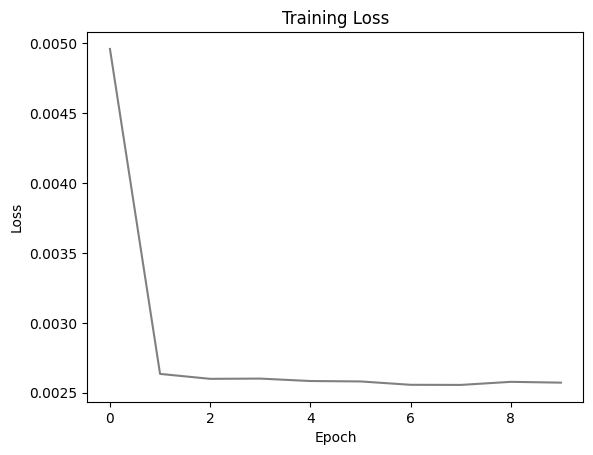

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt

X = df.drop(['Fraud', 'FraudType'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 75
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(Bidirectional(LSTM(units=75), input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [6]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


2397/2397 [==============================] - 17s 7ms/step
Accuracy: 0.9997
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     76670
           1       0.00      0.00      0.00        22

    accuracy                           1.00     76692
   macro avg       0.50      0.50      0.50     76692
weighted avg       1.00      1.00      1.00     76692

Confusion Matrix:
 [[76670     0]
 [   22     0]]


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [7]:
df = pd.read_csv("../../labelled_data/DMEPOS/dmepos_rus_features.csv")

In [8]:
df = df.drop(["Unnamed: 0.1","Unnamed: 0","Rfrg_NPI"],axis=1)

In [9]:
df

,Rfrg_Prvdr_Crdntls,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Rfrg_Prvdr_Type_Flag,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,...,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Fraud
0,4437,1.0,65,1.0,2,10,16.0,18,41,4202.72,...,0.75,0.75,0.75,0.75,0.00,0.72,0.0,0.00,6.806234,0
1,1997,1.0,65,1.0,6,22,42.0,220,324,53997.47,...,0.60,0.75,0.75,0.67,0.20,0.69,0.0,0.09,3.433250,0
2,4587,0.0,87,1.0,5,9,18.0,34,172,6297.83,...,0.70,0.61,0.73,0.64,0.00,0.64,0.0,0.00,2.244400,0
3,419,1.0,65,1.0,5,7,25.0,32,1503,8361.72,...,0.56,0.69,0.59,0.63,0.00,0.50,0.0,0.00,1.217893,0
4,2362,0.0,30,1.0,12,18,112.0,372,96088,437064.15,...,0.70,0.63,0.75,0.61,0.21,0.23,0.0,0.00,8.338480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,3017,0.0,26,1.0,19,22,20.0,58,2584,21190.91,...,0.75,0.70,0.75,0.55,0.00,0.56,0.0,0.00,2.013313,1
200,2362,0.0,29,1.0,4,16,13.0,44,468,5537.80,...,0.42,0.65,0.75,0.21,0.00,0.40,0.0,0.00,2.464125,1
201,3017,0.0,26,1.0,1,1,17.0,12,12,929.52,...,0.75,0.69,0.75,0.53,0.00,0.75,0.0,0.00,4.301000,1
202,3017,0.0,29,0.0,14,18,61.0,84,491,44971.91,...,0.46,0.57,0.75,0.46,0.17,0.51,0.0,0.00,1.282148,1


(163, 75)
(163, 1, 75)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 150)               90600     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 128)               19328     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 110057 (429.91 KB)
Trainable params: 110057 (429.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 0.7349 - accuracy: 0.4769 - val_loss: 0.6729 - val_accuracy: 0.6061
Epoch 2/10
2/2 [==============================] - 0s

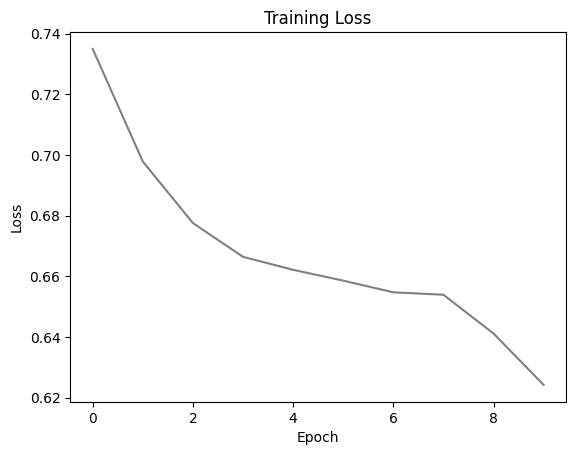

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 75
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(Bidirectional(LSTM(units=75), input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [11]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


2/2 [==============================] - 1s 597ms/step
Accuracy: 0.7073
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.71      0.63      0.67        19

    accuracy                           0.71        41
   macro avg       0.71      0.70      0.70        41
weighted avg       0.71      0.71      0.71        41

Confusion Matrix:
 [[17  5]
 [ 7 12]]


In [12]:
df = pd.read_csv("../../labelled_data/DMEPOS/dmepos_ros_features.csv")

In [13]:
df = df.drop(["Unnamed: 0.1","Unnamed: 0","Rfrg_NPI"],axis=1)

In [14]:
df

,Rfrg_Prvdr_Crdntls,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Rfrg_Prvdr_Type_Flag,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,...,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Fraud
0,2362,0.0,44,1.0,8,7,11.0,132,159,29869.97,...,0.75,0.75,0.75,0.32,0.0,0.64,0.0,0.00,3.729650,0
1,3017,0.0,26,1.0,28,47,33.0,97,1136,44435.62,...,0.75,0.73,0.75,0.39,0.0,0.58,0.0,0.00,1.654308,0
2,1629,1.0,44,1.0,11,44,19.0,65,1117,18711.69,...,0.68,0.74,0.75,0.53,0.0,0.68,0.0,0.00,1.894526,0
3,2684,0.0,117,1.0,5,12,23.0,29,4778,26951.30,...,0.64,0.54,0.69,0.48,0.0,0.75,0.0,0.00,2.173167,0
4,4511,1.0,87,1.0,1,1,13.0,13,13,2080.00,...,0.00,0.75,0.75,0.00,0.0,0.75,0.0,0.00,0.819692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766705,3017,0.0,26,1.0,4,11,20.0,20,1499,10756.06,...,0.44,0.63,0.75,0.54,0.0,0.55,0.0,0.00,2.950000,1
766706,3017,0.0,44,1.0,1,5,11.0,35,58,8610.00,...,0.58,0.75,0.75,0.75,0.0,0.71,0.0,0.00,2.946854,1
766707,1186,1.0,26,1.0,9,27,11.0,38,527,24189.32,...,0.41,0.50,0.75,0.00,0.0,0.00,0.0,0.00,4.920779,1
766708,3017,0.0,85,1.0,9,18,20.0,197,256,24346.83,...,0.64,0.65,0.75,0.65,0.0,0.75,0.0,0.19,4.135803,1


(613368, 75)
(613368, 1, 75)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 150)               90600     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               19328     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 110057 (429.91 KB)
Trainable params: 110057 (429.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3834/3834 [==============================] - 111s 28ms/step - loss: 0.6303 - accuracy: 0.6221 - val_loss: 0.6317 - val_accuracy: 0.5941
Epoch 2/10
3834/3834 [==============

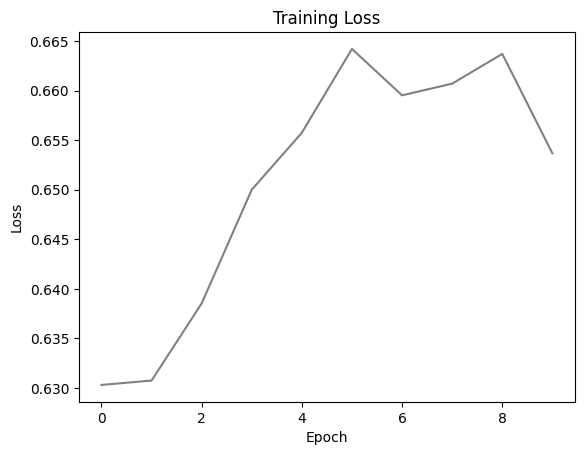

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 75
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(Bidirectional(LSTM(units=75), input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [16]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


4792/4792 [==============================] - 42s 9ms/step
Accuracy: 0.6123
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.85      0.69     76532
           1       0.72      0.37      0.49     76810

    accuracy                           0.61    153342
   macro avg       0.65      0.61      0.59    153342
weighted avg       0.65      0.61      0.59    153342

Confusion Matrix:
 [[65110 11422]
 [48033 28777]]


In [2]:
df = pd.read_csv("../../labelled_data/DMEPOS/dmepos_smote_features.csv")

In [3]:
df = df.drop(["Unnamed: 0.1","Unnamed: 0","Rfrg_NPI"],axis=1)

(594292, 75)
(594292, 1, 75)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 150)               90600     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 110057 (429.91 KB)
Trainable params: 110057 (429.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3715/3715 [==============================] - 228s 58ms/step - loss: 0.6140 - accuracy: 0.6472 - val_loss: 0.6204 - val_accuracy: 0.6424
Epoch 2/10
3715/3715 [==============

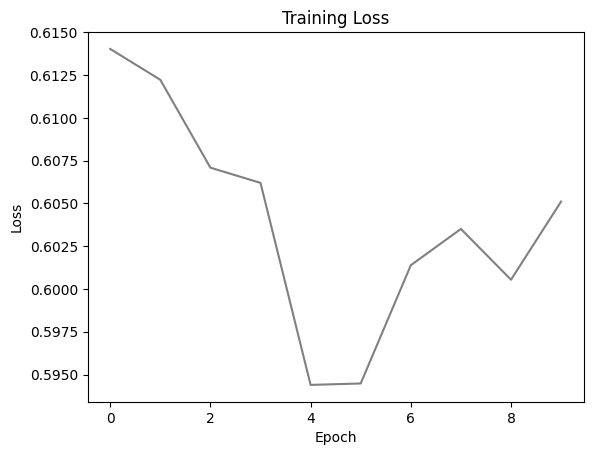

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 75
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(Bidirectional(LSTM(units=75), input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [6]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


4643/4643 [==============================] - 24s 5ms/step
Accuracy: 0.6568
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.48      0.58     72982
           1       0.62      0.82      0.71     75592

    accuracy                           0.66    148574
   macro avg       0.67      0.65      0.65    148574
weighted avg       0.67      0.66      0.65    148574

Confusion Matrix:
 [[35250 37732]
 [13256 62336]]
